In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')
from lib import *

In [2]:
data = np.load('../aafreqpca/data/data.npz')
aa = data['human']

## Mutual information between amino acid and protein

X = amino acid, Y = protein. We have $\operatorname{I}(X;Y) = \mathbb{E}_Y\left[D_\text{KL}\!\left(p_{X|Y} \parallel p_X\right)\right]$, and P(Y) = 1/number of proteins.

In [3]:
meanfreq = aa.mean(axis=0)
np.sum(aa*np.log2(aa/meanfreq))/aa.shape[0]

0.09741991137385587

## Mutual information in shuffled data

$\sum_i \sum_j < f_i^p f_j^p> \log_2 \frac{< f_i^p f_j^p>}{ <f_i^p> <f_j^p>}$

In [4]:
meanfreqs = np.einsum('i,j->ij', meanfreq, meanfreq)

In [5]:
freqss = np.einsum('ki,kj->ij', aa, aa)/aa.shape[0]
np.sum(freqss * np.log2(freqss/meanfreqs))

0.0014361921190761484

## Kullback-Leibler Divergences between protein amino acid distributions and the background

In [6]:
freqs = np.einsum('ki,kj->kij', aa, aa)
devs = np.sum(np.sum(freqs * np.log2(freqs/meanfreqs[np.newaxis, :, :]), axis=1), axis=1)

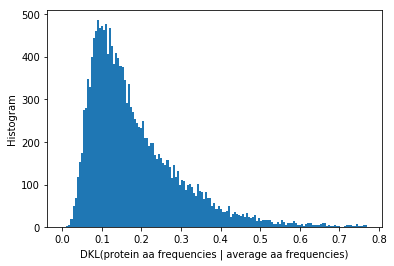

In [12]:
plt.hist(devs.flatten(), bins=np.linspace(0.0, np.percentile(devs, 99), 150));
plt.xlabel('DKL(protein aa frequencies | average aa frequencies)')
plt.ylabel('Histogram');